# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

(Please insert the background here )


## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [544]:
import requests

url_get = requests.get('https://www.exchange-rates.org/history/IDR/USD/T')
url_get

<Response [200]>

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [545]:
url_get.content[1:777]

b'\n<!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n    <html class="no-js ie8 oldie" lang=\'en\' xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--> <html class="no-js" lang=\'en\' xml:lang=\'en\'> <!--<![endif]-->\r\n<head><title>Indonesian Rupiah Exchange Rate - US Dollar - Historical Exchange Rates</title>\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta content="C#" name="CODE_LANGUAGE" />\n<meta content="JavaScript" name="vs_defaultClientScript" />\n<meta content="http://schemas.microsoft.com/intellisense/ie5" name="vs_targetSchema" />\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5">\n<meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\n\n<meta name="mapping" content="AP" />\n<base href="https://www.exchange-rates.org/" />'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [546]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

In [595]:
table = soup.find('table')
print(table.prettify())

<table class="table table-striped table-hover table-hover-solid-row table-simple history-data">
 <tbody>
  <tr>
   <td>
    7/7/2021
   </td>
   <td>
    Wednesday
   </td>
   <td>
    <a href="/Rate/USD/IDR/7-7-2021">
     14,503.93654
    </a>
    IDR
   </td>
   <td class="text-narrow-screen-hidden">
    <a href="/Rate/USD/IDR/7-7-2021">
     USD IDR rate for 7/7/2021
    </a>
   </td>
  </tr>
  <tr>
   <td>
    7/6/2021
   </td>
   <td>
    Tuesday
   </td>
   <td>
    <a href="/Rate/USD/IDR/7-6-2021">
     14,469.58258
    </a>
    IDR
   </td>
   <td class="text-narrow-screen-hidden">
    <a href="/Rate/USD/IDR/7-6-2021">
     USD IDR rate for 7/6/2021
    </a>
   </td>
  </tr>
  <tr>
   <td>
    7/5/2021
   </td>
   <td>
    Monday
   </td>
   <td>
    <a href="/Rate/USD/IDR/7-5-2021">
     14,493.33968
    </a>
    IDR
   </td>
   <td class="text-narrow-screen-hidden">
    <a href="/Rate/USD/IDR/7-5-2021">
     USD IDR rate for 7/5/2021
    </a>
   </td>
  </tr>
  <tr>
   <td>


Do the scrapping process here (please change this markdown with your explanation)

In [614]:
temp = []
row = table.find_all('tr',attrs={'class':None})
row_length= len(row)

for i in range(1,row_length):
    ExchangeDate =  row[i].find_all('td')[0].text
    RatePrice =  row[i].find_all('td')[2].text
    
    temp.append((ExchangeDate,RatePrice))
    

temp


[('7/6/2021', '14,469.58258 IDR'),
 ('7/5/2021', '14,493.33968 IDR'),
 ('7/2/2021', '14,497.65100 IDR'),
 ('7/1/2021', '13,270.37815 IDR'),
 ('6/30/2021', '14,491.89811 IDR'),
 ('6/29/2021', '13,215.84052 IDR'),
 ('6/28/2021', '14,439.22236 IDR'),
 ('6/25/2021', '14,426.82283 IDR'),
 ('6/24/2021', '14,436.21247 IDR'),
 ('6/23/2021', '14,440.32729 IDR'),
 ('6/22/2021', '14,396.08712 IDR'),
 ('6/21/2021', '14,426.42481 IDR'),
 ('6/18/2021', '14,440.13691 IDR'),
 ('6/17/2021', '14,383.75138 IDR'),
 ('6/16/2021', '14,376.12040 IDR'),
 ('6/15/2021', '14,205.14512 IDR'),
 ('6/14/2021', '14,205.68458 IDR'),
 ('6/11/2021', '14,241.97728 IDR'),
 ('6/10/2021', '14,262.89225 IDR'),
 ('6/9/2021', '14,258.61758 IDR'),
 ('6/8/2021', '14,256.29978 IDR'),
 ('6/7/2021', '14,222.58206 IDR'),
 ('6/4/2021', '14,227.49966 IDR'),
 ('6/3/2021', '14,353.54834 IDR'),
 ('6/2/2021', '14,276.29774 IDR'),
 ('6/1/2021', '14,274.83728 IDR'),
 ('5/31/2021', '14,238.06947 IDR'),
 ('5/28/2021', '14,283.54665 IDR'),
 ('

## Creating data frame & Data wrangling

Put the array into dataframe

In [615]:
import pandas as pd

df = pd.DataFrame(temp,columns =['ExchangeDate','Rate'])
df.head()

,ExchangeDate,Rate
0,7/6/2021,"14,469.58258 IDR"
1,7/5/2021,"14,493.33968 IDR"
2,7/2/2021,"14,497.65100 IDR"
3,7/1/2021,"13,270.37815 IDR"
4,6/30/2021,"14,491.89811 IDR"


In [616]:
df.describe()

,ExchangeDate,Rate
count,128,128
unique,128,128
top,5/18/2021,"14,048.72649 IDR"
freq,1,1


In [617]:
df.sort_values(by='ExchangeDate')

,ExchangeDate,Rate
126,1/11/2021,"14,137.24151 IDR"
125,1/12/2021,"14,074.81444 IDR"
124,1/13/2021,"14,125.90174 IDR"
123,1/14/2021,"14,070.58746 IDR"
122,1/15/2021,"14,153.46654 IDR"
...,...,...
19,6/9/2021,"14,258.61758 IDR"
3,7/1/2021,"13,270.37815 IDR"
2,7/2/2021,"14,497.65100 IDR"
1,7/5/2021,"14,493.33968 IDR"


Do the data cleaning here (please change this markdown with your explanation of what you do for data wrangling)

In [619]:
#TODO :
# Change ExchangeDate to datetime64 data type
df[['ExchangeDate']] = df[['ExchangeDate']].astype('datetime64')
# Change DayName to Category data type
# # Remove or split Price column for IDR and change Price to float64 data type
df['Rate'] = df['Rate'].str.replace('IDR','')
df['Rate'] = df['Rate'].str.replace(',','')
df['Rate'] = df['Rate'].astype('float64')
#for visualisation only
df['ExDate'] = df['ExchangeDate'].dt.strftime('%d-%m-%Y')

df.dtypes

ExchangeDate    datetime64[ns]
Rate                   float64
ExDate                  object
dtype: object

In [620]:
#Sort by Exchange Date
df.sort_values(by='ExchangeDate',ascending=True).head()

,ExchangeDate,Rate,ExDate
127,2021-01-08,13991.16348,08-01-2021
126,2021-01-11,14137.24151,11-01-2021
125,2021-01-12,14074.81444,12-01-2021
124,2021-01-13,14125.90174,13-01-2021
123,2021-01-14,14070.58746,14-01-2021


In [621]:
df=df.set_index('ExchangeDate')
df

,Rate,ExDate
ExchangeDate,,
2021-07-06,14469.58258,06-07-2021
2021-07-05,14493.33968,05-07-2021
2021-07-02,14497.65100,02-07-2021
2021-07-01,13270.37815,01-07-2021
2021-06-30,14491.89811,30-06-2021
...,...,...
2021-01-14,14070.58746,14-01-2021
2021-01-13,14125.90174,13-01-2021
2021-01-12,14074.81444,12-01-2021


### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

In [622]:
min_rate=df.min()[['Rate','ExDate']].to_list()
max_rate=df.max()[['Rate','ExDate']].to_list()
avg_rate=df.mean().to_list()
avg_rate

[14266.674457578123]


(Put your analysis and conclusion here.)

<AxesSubplot:xlabel='Exchange Date'>

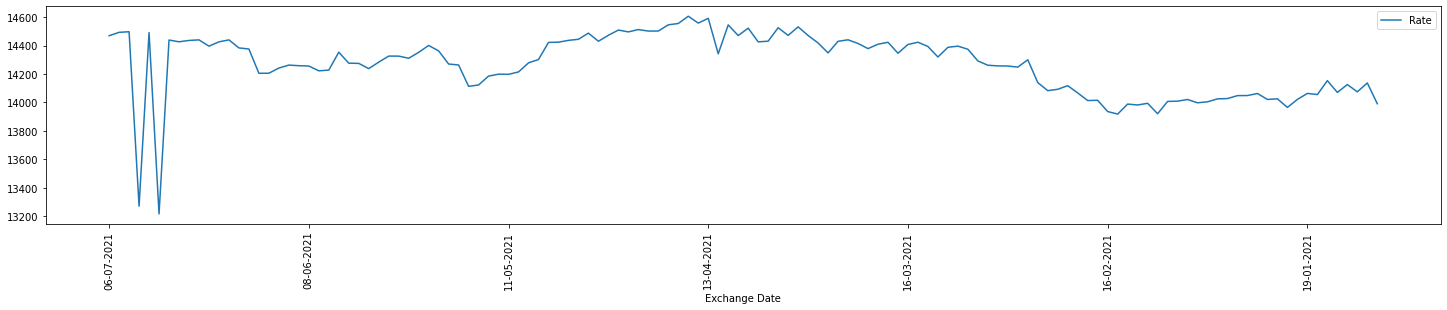

In [626]:

df.plot(
    x='ExDate',
    y='Rate',
    figsize=(25,4), 
    rot='vertical',
    xlabel='Exchange Date'
)

### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.

<AxesSubplot:xlabel='ExchangeDate'>

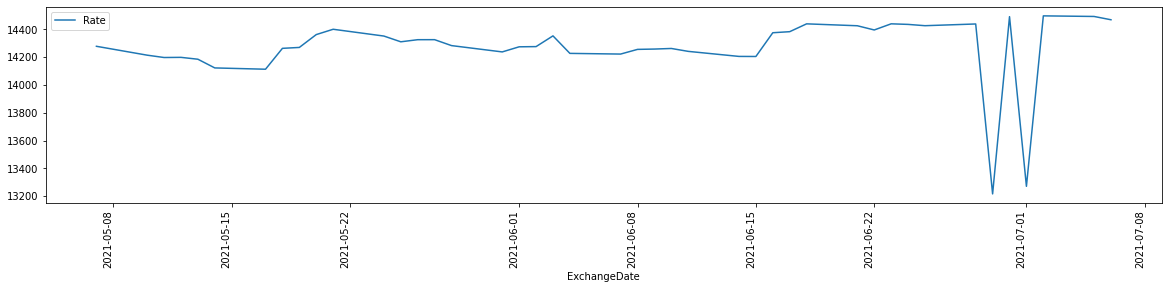

In [624]:
df['Periode'] = df.index.to_period('M')
last_period=df.index.max()
df_30 = df[df.index >= (last_period + pd.Timedelta(days=-60))]
df_30.plot(figsize=(20,4),rot='vertical')